In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
import pickle
import sys

%matplotlib notebook

sys.path.insert(0, "../..")
from groovy.pde import evolve, initialframe

In [3]:
def Basic_Plotting(ru,rv,f,k): #Input: PDE parameters
    inp = initialframe((100,100))
    time_array = evolve(inp,ru,rv,f,k) #Change in concentration of both chemicals over time. 
    distribution = time_array[:,:,:,1] #Change in concentration of chemical V over time.

    #Plotting:
    fig, ax = plt.subplots()
    image = ax.imshow(distribution[:,:,0], cmap='inferno',origin='lower',vmin=np.amin(distribution), vmax=np.amax(distribution)*0.5)
    fig.colorbar(image, label='Concentration of Reactant V')
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False) #Remove x,y ticks

    #Animating:
    def update(frame):
        image.set_data(distribution[:,:,frame]) #Progress to next slice of distribution

    frames = len(time_array[0,0])
    fps = 60
    animator = animation.FuncAnimation(fig, update, frames=frames, interval=1000/fps, repeat=True, cache_frame_data=False)
    fileName = f"diffusionReactionSim_{frames}TimeSteps.gif"
    animator.save(fileName, writer=animation.PillowWriter(fps=fps)) #Save function
    plt.show()

<IPython.core.display.Javascript object>


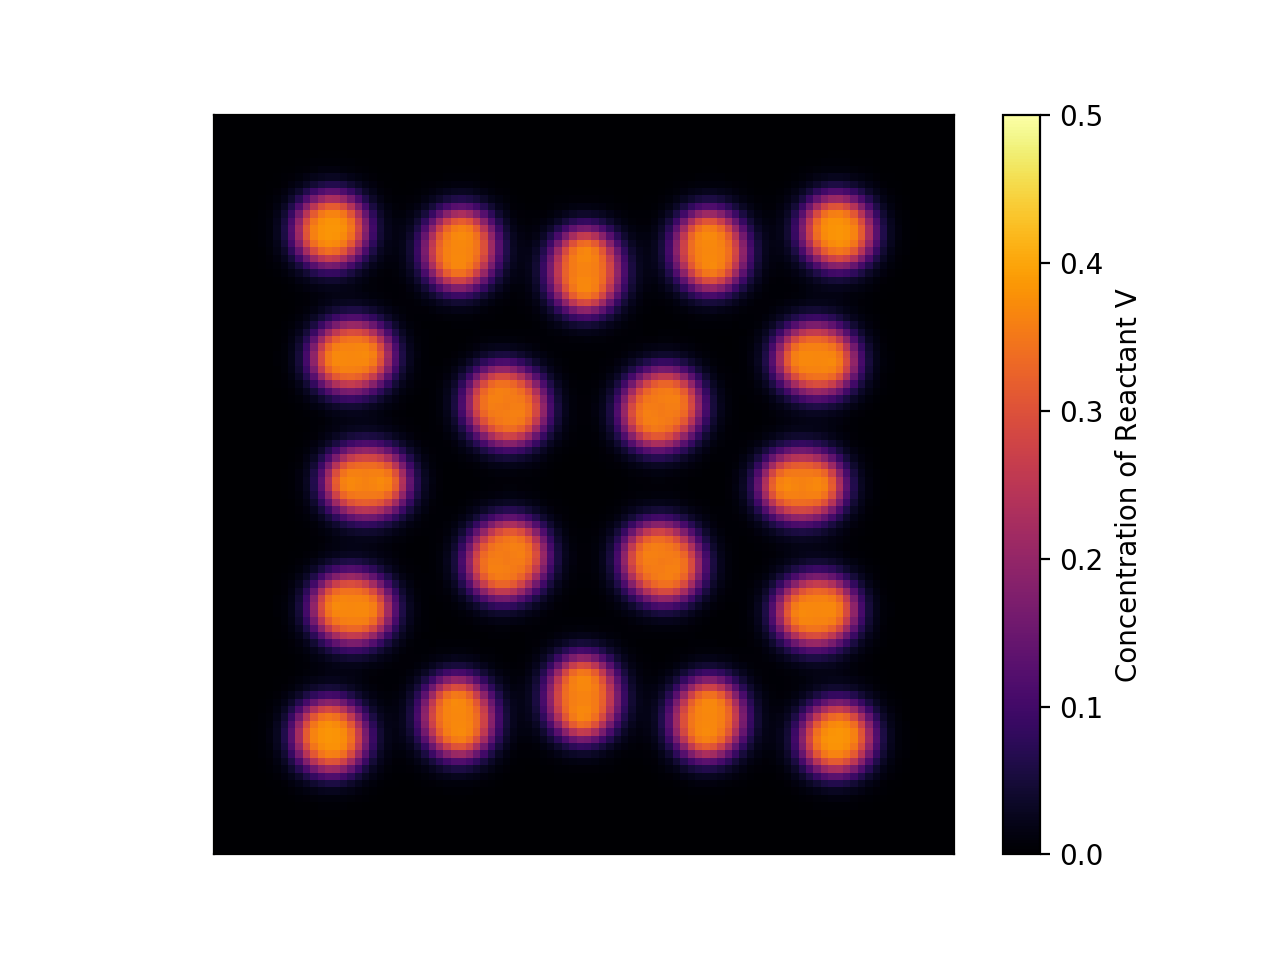

In [4]:
# define reaction and diffusion rate constants 
ru = 1.0
rv = 0.5
f = 0.0367
k = 0.0649

Basic_Plotting(ru,rv,f,k)